In [7]:
## LIBRARIES
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

In [8]:
## Input/Output
IMPORT_FOLDER =  "C:\\Users\\E2884\\Desktop\\WPy64-3980\\notebooks\\ENL_Script_analyse_magasin\\data\\"
FILE = "20231003_ME2N.xlsx"
FILE2 = "20231003_ZMM_EDT_COM_02.xlsx"
FILE3 = "BDD_MATRICULES.xlsx"

In [9]:
## Import data from xls to pandas
df_COMMANDE = pd.read_excel(IMPORT_FOLDER + FILE, sheet_name='Sheet1')
df_APPRO = pd.read_excel(IMPORT_FOLDER + FILE2,sheet_name='Feuil1')
df_MATRICULES = pd.read_excel(IMPORT_FOLDER + FILE3, sheet_name='Feuil1')

In [10]:
## Rename and list columns
df_COMMANDE.rename(columns = {"Document d'achat":'N_COMMANDE',
                          'Nom du fournisseur':'FOURNISSEUR',
                          "Groupe d'acheteurs":'GA',
                          'Date du document':'DATE_COMMANDE',
                          'Code de suppression':'CODE_SUP',
                          'Quantité de commande':'QUANTITE',
                          "Prix net":'PRIX',
                          'Devise':'DEVISE'}, inplace = True)
# for el in df_COMMANDE.columns.to_list():
#     print(el)

df_COMMANDE = df_COMMANDE[['N_COMMANDE','FOURNISSEUR','GA','DATE_COMMANDE','CODE_SUP','QUANTITE','PRIX','DEVISE']]
df_COMMANDE = df_COMMANDE[df_COMMANDE.CODE_SUP != 'L']

dict_DEVISE = {'AUD': 76.22,'CHF': 121.08 ,'EUR': 119.76 ,'GBP': 135.16 ,'NZD': 70.95,'USD': 111.95 ,'XPF':1}

df_COMMANDE['PRIX_XPF'] = df_COMMANDE['PRIX']*df_COMMANDE['DEVISE'].map(dict_DEVISE)

In [11]:
## Rename and list columns
df_APPRO.rename(columns = {"Document d'achat":'N_COMMANDE',
                          'Créé par':'MATRICULE'}, inplace = True)

# for el in df_APPRO.columns.to_list():
#     print(el)

df_APPRO = df_APPRO[['N_COMMANDE','MATRICULE']]

In [12]:
df_APPRO['DIGIT_MATRICULE'] = df_APPRO['MATRICULE'].astype(str).str[-4:]
df_MATRICULES['DIGIT_MATRICULE'] = df_MATRICULES['Matricule'].astype(str).str[-4:]

In [13]:
df_COMMANDE_tmp = pd.merge(df_COMMANDE,df_APPRO, on=['N_COMMANDE'])
df_COMMANDE_FIN = pd.merge(df_COMMANDE_tmp,df_MATRICULES, on=['DIGIT_MATRICULE'])

In [14]:
# NOMBRE & MONTANT COMMANDE PAR ANNEE
df_COMMANDE_FIN['Y_DATE_COMMANDE'] = df_COMMANDE_FIN['DATE_COMMANDE'].dt.strftime('%Y')

df_COMMANDE_FIN_gb_date_commande = df_COMMANDE_FIN.groupby('Y_DATE_COMMANDE').agg({'N_COMMANDE':'count','PRIX_XPF':'sum'})

df_COMMANDE_FIN_gb_fournisseur = df_COMMANDE_FIN.groupby('FOURNISSEUR').agg({'N_COMMANDE':'count','PRIX_XPF':'sum'}).sort_values('PRIX_XPF',ascending=False)
df_COMMANDE_FIN_gb_fournisseur['PRIX_XPF'] = df_COMMANDE_FIN_gb_fournisseur['PRIX_XPF'].apply(lambda x: "{:.1f} MXPF".format((x/1000000)))

print(df_COMMANDE_FIN_gb_fournisseur.head(20))

                             N_COMMANDE     PRIX_XPF
FOURNISSEUR                                         
NEODEL ENGIE (EX ENDEL)             739  2410.5 MXPF
TEAM TURBO-MACHINES                 913  1626.5 MXPF
BOSCH REXROTH SAS                    55  1556.0 MXPF
HYDAC                                96  1360.8 MXPF
ALSTOM POWER (FR)                  1198  1256.8 MXPF
LISBON ENGINEERING PTY LTD           28  1196.5 MXPF
SOCALMO                             880  1186.9 MXPF
JERA GLOBAL MARKETS PTE LTD           7   731.3 MXPF
CALEDONIENNE DES EAUX               560   707.9 MXPF
ALSTOM POWER (AU)                   637   679.1 MXPF
CENTENNIAL  COAL                     71   640.7 MXPF
GLENCORE                              6   602.2 MXPF
ICE NC                              912   565.1 MXPF
GR BUILDING LIMITED                   5   547.2 MXPF
VIKENA KAMALIELE                    343   483.9 MXPF
ECOM                                275   483.7 MXPF
ROBICAL                            1437   440.

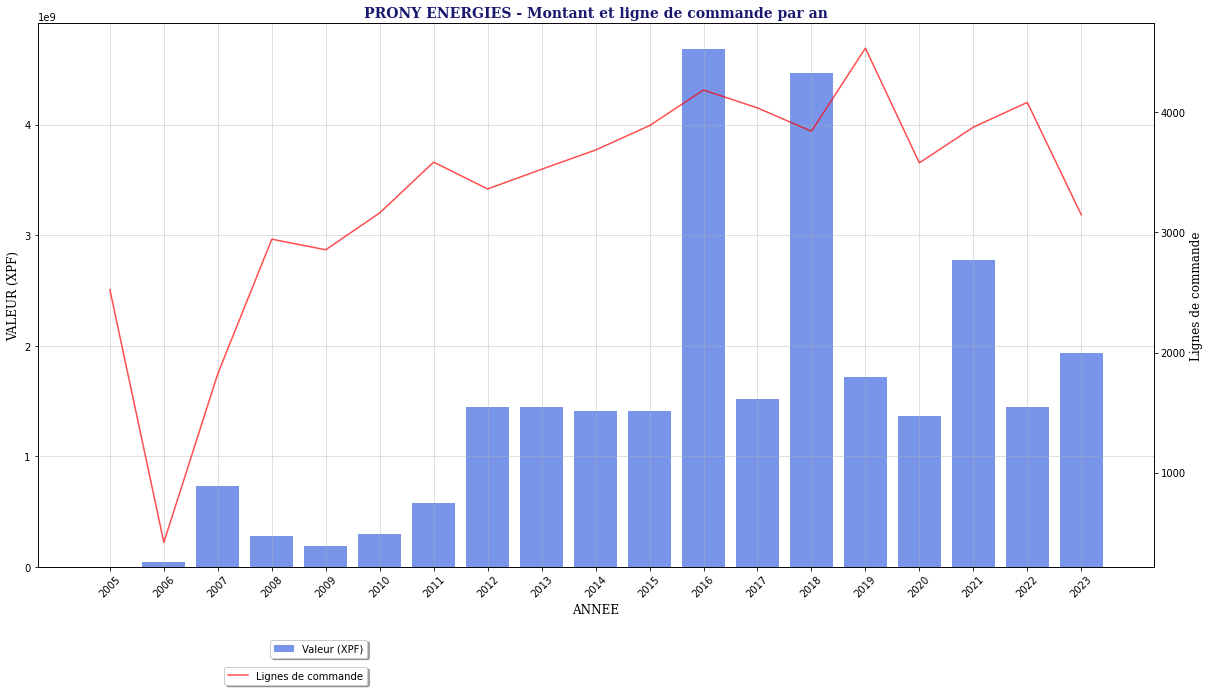

In [15]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Montant et ligne de commande par an"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "ANNEE"
xtick_rotation = 45

y_label = "VALEUR (XPF)"
y2_label = "LIGNE CMD"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'royalblue'
y1_alpha = 0.7
y1_label = 'Valeur (XPF)'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Lignes de commande'

graph_linestyle = 'solid'

# # Paramètres texte instructions
# texte = "Ces données n'incluent pas le charbon \n\
# et les articles n'étant jamais sortis"

# text_x = -5
# text_y = 240
# text_family = 'serif'
# text_color = 'black'
# text_weight = 'light'
# text_size = 12
# bbox_facecolor = 'lemonchiffon'
# bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_COMMANDE_FIN_gb_date_commande.index.values, df_COMMANDE_FIN_gb_date_commande.PRIX_XPF, color=y1_color, alpha = y1_alpha, label=y1_label)

axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

#Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe2.plot(df_COMMANDE_FIN_gb_date_commande.index.values, df_COMMANDE_FIN_gb_date_commande.N_COMMANDE, color = y2_color, linestyle=graph_linestyle, alpha = y2_alpha, label=y2_label)

axe2.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(0,101)

In [16]:
# NOMBRE & MONTANT COMMANDE PAR ANNEE et par GF
liste_GA = df_COMMANDE_FIN['GA'].explode().unique()

# création de df par GA
dict_df={}
for el in liste_GA:
    dict_df["df_COMMANDE_FIN_{0}".format(el)]=df_COMMANDE_FIN[df_COMMANDE_FIN.GA == el]

# gb year
dict_df_gb = {}
for df in dict_df.keys():
    GAc = re.findall(r'df_COMMANDE_FIN_(\w+)',df)
    dict_df[df]['Y_DATE_COMMANDE'] = dict_df[df]['DATE_COMMANDE'].dt.strftime('%Y')
    dict_df_gb["df_COMMANDE_FIN_{0}_gb_date_commande".format(GAc[0])] = dict_df[df].groupby('Y_DATE_COMMANDE').agg({'N_COMMANDE':'count','PRIX_XPF':'sum'}).rename(columns={"PRIX_XPF":"PRIX_XPF_{0}".format(GAc[0]),"N_COMMANDE":"N_COMMANDE_{0}".format(GAc[0])})

liste_df = list(dict_df_gb.values())
df_COMMANDE_FIN_gb_date_ga = pd.concat(liste_df, axis=1)
df_COMMANDE_FIN_gb_date_ga = df_COMMANDE_FIN_gb_date_ga.fillna(0)

C:\Users\E2884\AppData\Local\Temp/ipykernel_12696/1687209517.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df[df]['Y_DATE_COMMANDE'] = dict_df[df]['DATE_COMMANDE'].dt.strftime('%Y')


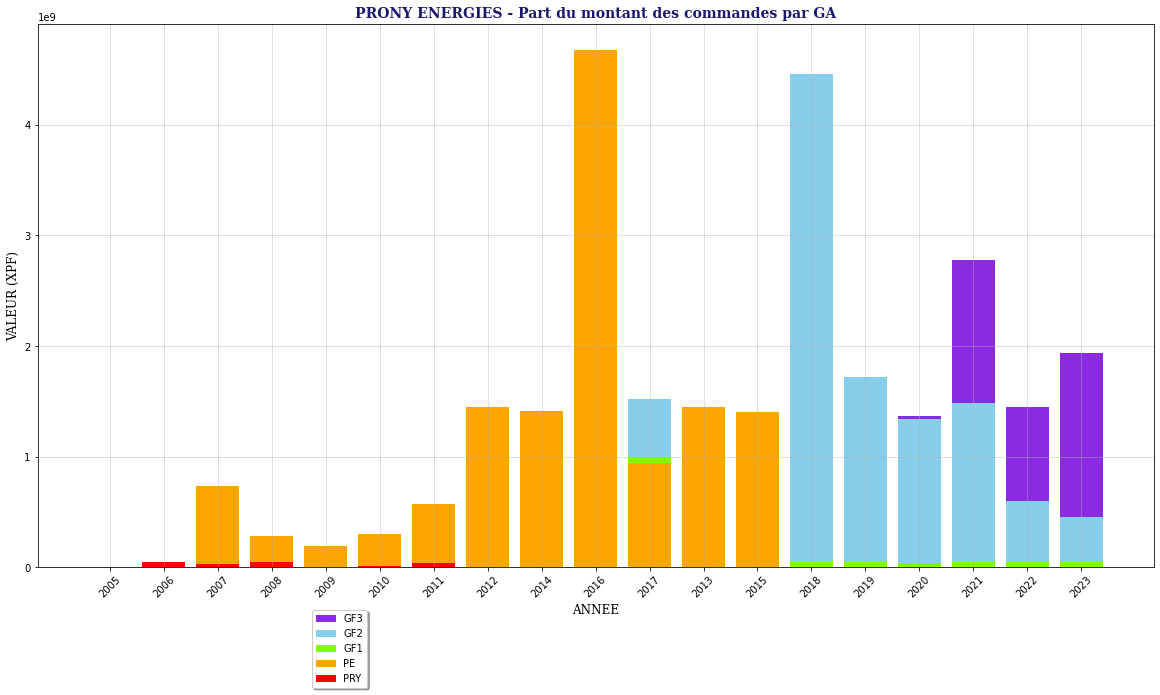

In [17]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Part du montant des commandes par GA"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "ANNEE"
xtick_rotation = 45

y_label = "VALEUR (XPF)"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y_alpha = 1

y1_color = 'red'
y1_label = 'PRY'
y2_color = 'orange'
y2_label = 'PE'
y3_color = 'chartreuse'
y3_label = 'GF1'
y4_color = 'skyblue'
y4_label = 'GF2'
y5_color = 'blueviolet'
y5_label = 'GF3'


# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})


axe1.bar(df_COMMANDE_FIN_gb_date_ga.index.values,\
         df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_PRY+df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_PE + df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_GF1 + df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_GF2 + df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_GF3,\
         color=y5_color, alpha = y_alpha, label=y5_label)

axe1.bar(df_COMMANDE_FIN_gb_date_ga.index.values,\
         df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_PRY+df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_PE + df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_GF1 + df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_GF2,\
         color=y4_color, alpha = y_alpha, label=y4_label)

axe1.bar(df_COMMANDE_FIN_gb_date_ga.index.values,\
         df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_PRY+df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_PE + df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_GF1,\
         color=y3_color, alpha = y_alpha, label=y3_label)

axe1.bar(df_COMMANDE_FIN_gb_date_ga.index.values,\
         df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_PRY+df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_PE,\
         color=y2_color, alpha = y_alpha, label=y2_label)

axe1.bar(df_COMMANDE_FIN_gb_date_ga.index.values,\
         df_COMMANDE_FIN_gb_date_ga.PRIX_XPF_PRY,\
         color=y1_color, alpha = y_alpha, label=y1_label)


axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

In [18]:
# Filtre sur une date
DATE_FILTRE = '2022-07-01'
df_COMMANDE_FIN_EX = df_COMMANDE_FIN[df_COMMANDE_FIN.DATE_COMMANDE > DATE_FILTRE]

NOMBRE_COMMANDE_EX = df_COMMANDE_FIN_EX['N_COMMANDE'].nunique()
NOMBRE_LIGNE_COMMANDE_EX = df_COMMANDE_FIN_EX['N_COMMANDE'].count()
NOMBRE_MOY_LIGNE_COMMANDE = round(NOMBRE_LIGNE_COMMANDE_EX/NOMBRE_COMMANDE_EX)

VALEUR_COMMANDE_EX = round(df_COMMANDE_FIN_EX['PRIX_XPF'].sum())
VALEUR_MOY_PAR_COMMANDE = round(VALEUR_COMMANDE_EX/NOMBRE_COMMANDE_EX)
VALEUR_MOY_PAR_LIGNE = round(VALEUR_COMMANDE_EX/NOMBRE_LIGNE_COMMANDE_EX)

print("{:<35} --> {:<7}".format("Nombre de commande sur la période",NOMBRE_COMMANDE_EX))
print("{:<35} --> {:<7}".format("Nombre de commande sur la période",NOMBRE_LIGNE_COMMANDE_EX))
print("{:<35} --> {:<7}".format("Nombre de ligne moyen par commande",NOMBRE_MOY_LIGNE_COMMANDE))

print("{:<35} --> {:<7} MXPF".format("Valeur des commandes sur la période",round(VALEUR_COMMANDE_EX/1000000)))
print("{:<35} --> {:<7} XPF".format("Valeur moyenne par commande",VALEUR_MOY_PAR_COMMANDE))
print("{:<35} --> {:<7} XPF".format("Valeur moyenne par ligne",VALEUR_MOY_PAR_LIGNE))
print("")

df_COMMANDE_FIN_EX_gb_fournisseur = df_COMMANDE_FIN_EX.groupby('FOURNISSEUR').agg({'N_COMMANDE':'count','PRIX_XPF':'sum'}).sort_values('PRIX_XPF',ascending=False)
df_COMMANDE_FIN_EX_gb_fournisseur['PART_PCT'] = round(df_COMMANDE_FIN_EX_gb_fournisseur['PRIX_XPF']/VALEUR_COMMANDE_EX*100,2)
df_COMMANDE_FIN_EX_gb_fournisseur['PARETO_PCT'] = round(df_COMMANDE_FIN_EX_gb_fournisseur['PRIX_XPF'].cumsum()/VALEUR_COMMANDE_EX*100,2)
df_COMMANDE_FIN_EX_gb_fournisseur['PRIX_XPF'] = df_COMMANDE_FIN_EX_gb_fournisseur['PRIX_XPF'].apply(lambda x: "{:.1f} MXPF".format((x/1000000)))
print(df_COMMANDE_FIN_EX_gb_fournisseur.head(25))

Nombre de commande sur la période   --> 1952   
Nombre de commande sur la période   --> 5129   
Nombre de ligne moyen par commande  --> 3      
Valeur des commandes sur la période --> 2654    MXPF
Valeur moyenne par commande         --> 1359814 XPF
Valeur moyenne par ligne            --> 517519  XPF

                                   N_COMMANDE    PRIX_XPF  PART_PCT  \
FOURNISSEUR                                                           
TEAM TURBO-MACHINES                       244  501.7 MXPF     18.90   
NEODEL ENGIE (EX ENDEL)                    64  399.2 MXPF     15.04   
SOCALMO                                    45  128.3 MXPF      4.83   
ATI EXPORT                                342   90.4 MXPF      3.41   
ROBICAL                                   105   86.9 MXPF      3.28   
YOKOGAWA AUSTRALIE                         36   80.5 MXPF      3.03   
STNI.NC                                    82   78.6 MXPF      2.96   
OCEANIC CONCEPT ENERGY                    105   68.1 MXPF  

In [19]:
df_COMMANDE_FIN_EX_gb_agent = df_COMMANDE_FIN_EX.groupby('Agent').agg({'N_COMMANDE':'count','PRIX_XPF':'sum'}).sort_values('PRIX_XPF',ascending=False)
print(df_COMMANDE_FIN_EX_gb_agent)

               N_COMMANDE      PRIX_XPF
Agent                                  
N. Wendt              790  1.150144e+09
J. Rota              1442  6.248462e+08
M. ATUFELE            847  2.916202e+08
L. Lutikova           565  2.864436e+08
K. Sakoumory          756  2.471402e+08
J. Wamo               660  5.397901e+07
G. PUJAPUJANE          69  1.829400e+05


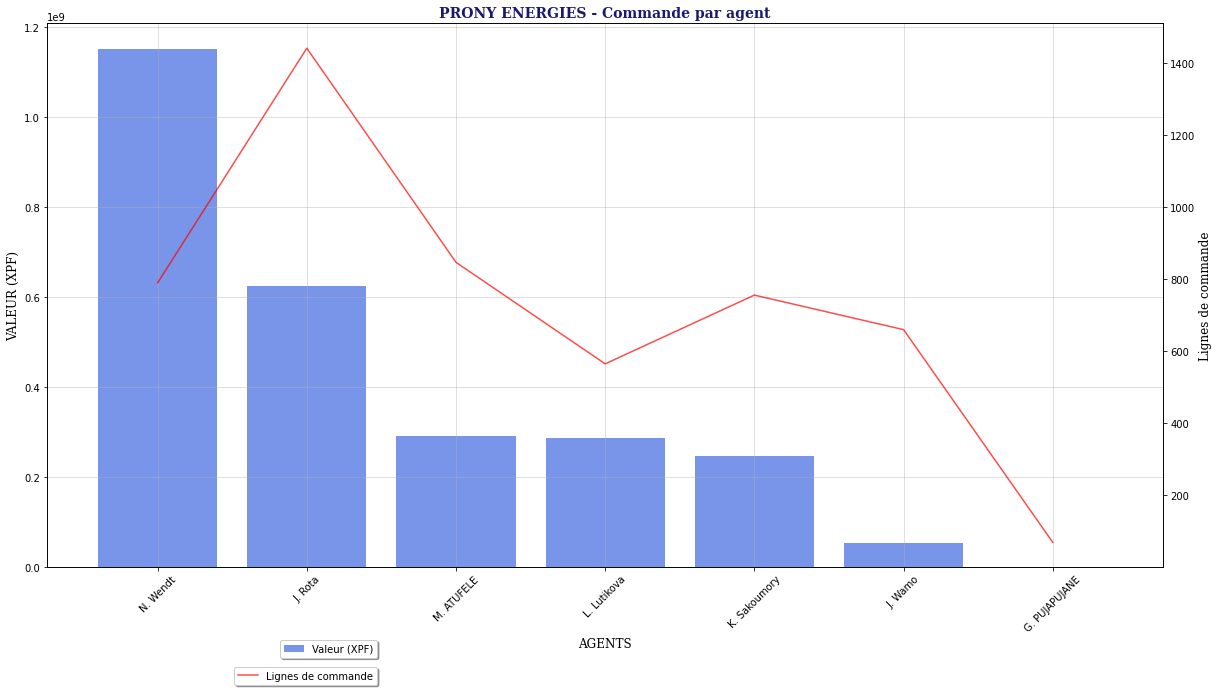

In [20]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Commande par agent"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "AGENTS"
xtick_rotation = 45

y_label = "VALEUR (XPF)"
y2_label = "LIGNE CMD"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'royalblue'
y1_alpha = 0.7
y1_label = 'Valeur (XPF)'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Lignes de commande'

graph_linestyle = 'solid'

# # Paramètres texte instructions
# texte = "Ces données n'incluent pas le charbon \n\
# et les articles n'étant jamais sortis"

# text_x = -5
# text_y = 240
# text_family = 'serif'
# text_color = 'black'
# text_weight = 'light'
# text_size = 12
# bbox_facecolor = 'lemonchiffon'
# bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_COMMANDE_FIN_EX_gb_agent.index.values, df_COMMANDE_FIN_EX_gb_agent.PRIX_XPF, color=y1_color, alpha = y1_alpha, label=y1_label)

axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

#Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe2.plot(df_COMMANDE_FIN_EX_gb_agent.index.values, df_COMMANDE_FIN_EX_gb_agent.N_COMMANDE, color = y2_color, linestyle=graph_linestyle, alpha = y2_alpha, label=y2_label)

axe2.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(0,101)

In [21]:
# NOMBRE & MONTANT COMMANDE PAR ANNEE
# df_COMMANDE_FIN_EX['YW_DATE_COMMANDE'] = df_COMMANDE_FIN['DATE_COMMANDE'].dt.strftime('%Y-%W')


# NOMBRE & MONTANT COMMANDE PAR ANNEE et par GF
liste_agent = df_COMMANDE_FIN_EX['Agent'].explode().unique()
liste_agent_bis = [w.replace('. ', '_') for w in liste_agent]

# création de df par GA
dict_df={}
for i,el in enumerate(liste_agent_bis):
    dict_df["df_COMMANDE_FIN_EX_{0}".format(el)]=df_COMMANDE_FIN_EX[df_COMMANDE_FIN_EX.Agent == liste_agent[i]]

# gb week
dict_df_gb = {}
for df in dict_df.keys():
    agent = re.findall(r'df_COMMANDE_FIN_EX_(\w+)',df)
    dict_df[df]['YW_DATE_COMMANDE'] = dict_df[df]['DATE_COMMANDE'].dt.strftime('%Y-%W')
    dict_df_gb["df_COMMANDE_FIN_{0}_gb_date_commande".format(agent[0])] = dict_df[df].groupby('YW_DATE_COMMANDE').agg({'N_COMMANDE':'count','PRIX_XPF':'sum'}).rename(columns={"PRIX_XPF":"PRIX_XPF_{0}".format(agent[0]),"N_COMMANDE":"N_COMMANDE_{0}".format(agent[0])})

liste_df = list(dict_df_gb.values())

df_COMMANDE_FIN_gb_date_agent = pd.concat(liste_df, axis=1).sort_values('YW_DATE_COMMANDE',ascending=True)
df_COMMANDE_FIN_gb_date_agent = df_COMMANDE_FIN_gb_date_agent.fillna(0)

print(dict_df_gb.values())

dict_values([                  N_COMMANDE_J_Wamo  PRIX_XPF_J_Wamo
YW_DATE_COMMANDE                                    
2022-27                          21         772247.0
2022-28                          15         407072.0
2022-29                           9         646648.0
2022-30                           2         314829.0
2022-31                           9         385346.0
2022-33                           3         279575.0
2022-34                           7        1138394.0
2022-35                          12         783355.0
2022-36                           5         339050.0
2022-37                          11         540116.0
2022-38                          12         151833.0
2022-39                          19        1012707.0
2022-40                          10         527453.0
2022-41                           9         345403.0
2022-42                          20         543505.0
2022-43                           5         172010.0
2022-44                          

C:\Users\E2884\AppData\Local\Temp/ipykernel_12696/4125097372.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df[df]['YW_DATE_COMMANDE'] = dict_df[df]['DATE_COMMANDE'].dt.strftime('%Y-%W')


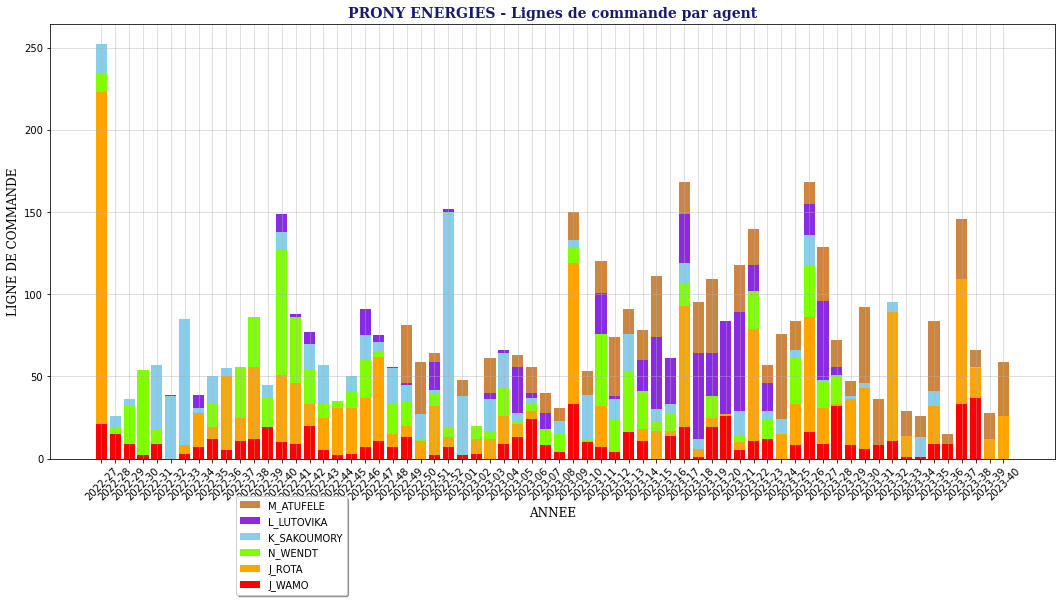

In [22]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Lignes de commande par agent"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "ANNEE"
xtick_rotation = 45

y_label = "LIGNE DE COMMANDE"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y_alpha = 1

y1_color = 'red'
y1_label = 'J_WAMO'
y2_color = 'orange'
y2_label = 'J_ROTA'
y3_color = 'chartreuse'
y3_label = 'N_WENDT'
y4_color = 'skyblue'
y4_label = 'K_SAKOUMORY'
y5_color = 'blueviolet'
y5_label = 'L_LUTOVIKA'
y6_color = 'peru'
y6_label = 'M_ATUFELE'


# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(18,8), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Wamo+df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Rota + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_N_Wendt + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_K_Sakoumory + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_L_Lutikova + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_M_ATUFELE,\
         color=y6_color, alpha = y_alpha, label=y6_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Wamo+df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Rota + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_N_Wendt + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_K_Sakoumory + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_L_Lutikova,\
         color=y5_color, alpha = y_alpha, label=y5_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Wamo+df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Rota + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_N_Wendt + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_K_Sakoumory,\
         color=y4_color, alpha = y_alpha, label=y4_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Wamo+df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Rota + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_N_Wendt,\
         color=y3_color, alpha = y_alpha, label=y3_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Wamo+df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Rota,\
         color=y2_color, alpha = y_alpha, label=y2_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_J_Wamo,\
         color=y1_color, alpha = y_alpha, label=y1_label)


axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

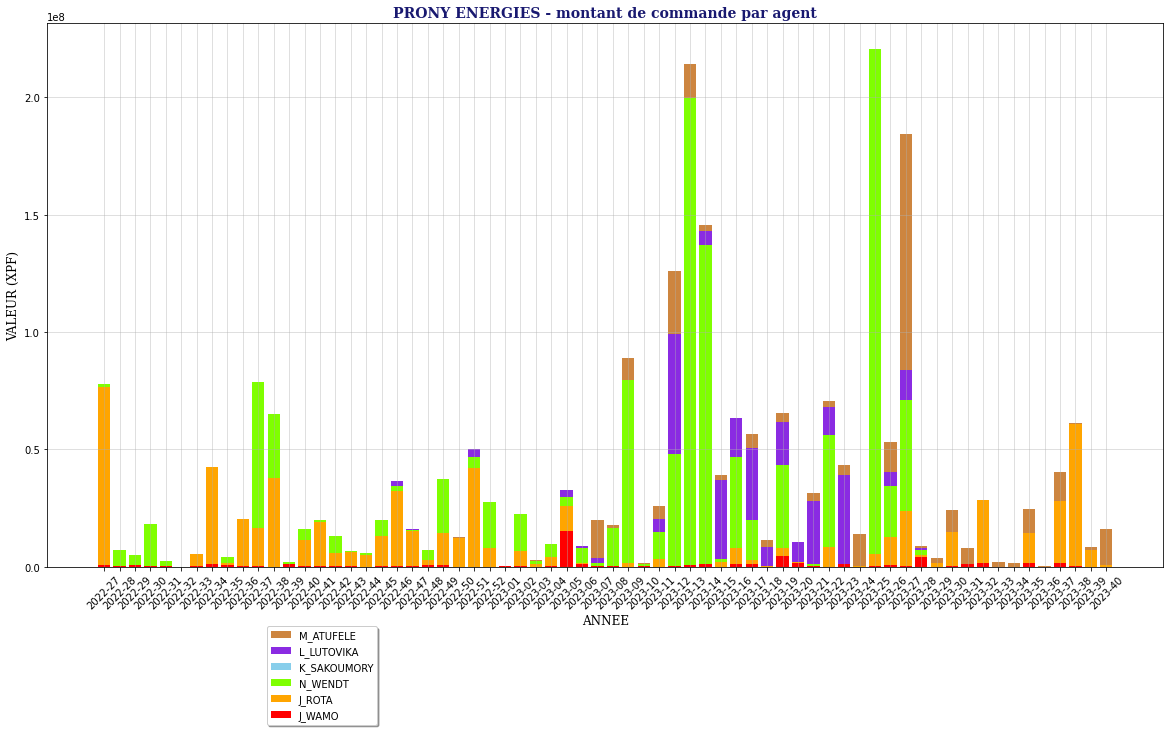

In [23]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - montant de commande par agent"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "ANNEE"
xtick_rotation = 45

y_label = "VALEUR (XPF)"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y_alpha = 1

y1_color = 'red'
y1_label = 'J_WAMO'
y2_color = 'orange'
y2_label = 'J_ROTA'
y3_color = 'chartreuse'
y3_label = 'N_WENDT'
y4_color = 'skyblue'
y4_label = 'K_SAKOUMORY'
y5_color = 'blueviolet'
y5_label = 'L_LUTOVIKA'
y6_color = 'peru'
y6_label = 'M_ATUFELE'


# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Wamo+df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Rota + df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_N_Wendt + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_K_Sakoumory + df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_L_Lutikova + df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_M_ATUFELE,\
         color=y6_color, alpha = y_alpha, label=y6_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Wamo+df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Rota + df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_N_Wendt + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_K_Sakoumory + df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_L_Lutikova,\
         color=y5_color, alpha = y_alpha, label=y5_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Wamo+df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Rota + df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_N_Wendt + df_COMMANDE_FIN_gb_date_agent.N_COMMANDE_K_Sakoumory,\
         color=y4_color, alpha = y_alpha, label=y4_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Wamo+df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Rota + df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_N_Wendt,\
         color=y3_color, alpha = y_alpha, label=y3_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Wamo+df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Rota,\
         color=y2_color, alpha = y_alpha, label=y2_label)

axe1.bar(df_COMMANDE_FIN_gb_date_agent.index.values,\
         df_COMMANDE_FIN_gb_date_agent.PRIX_XPF_J_Wamo,\
         color=y1_color, alpha = y_alpha, label=y1_label)


axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)